In [ ]:
import keras
from keras import layers

encoding_dim = 32
#input
# This is our input image
input_img = keras.Input(shape=(784,))
#encoded representation(input)
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)
# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

#### 1.Implement Vanilla autoencoder

In [ ]:
encoder = keras.Model(input_img, encoded)

In [ ]:
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 7ms/step - loss: 0.2749 - val_loss: 0.1891
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1700 - val_loss: 0.1527
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1440 - val_loss: 0.1338
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1287 - val_loss: 0.1215
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1183 - val_loss: 0.1129
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1111 - val_loss: 0.1070
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1061 - val_loss: 0.1029
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1025 - val_loss: 0.0997
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0997 - val_loss: 0.0973
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0978 - val_loss: 0.0957

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


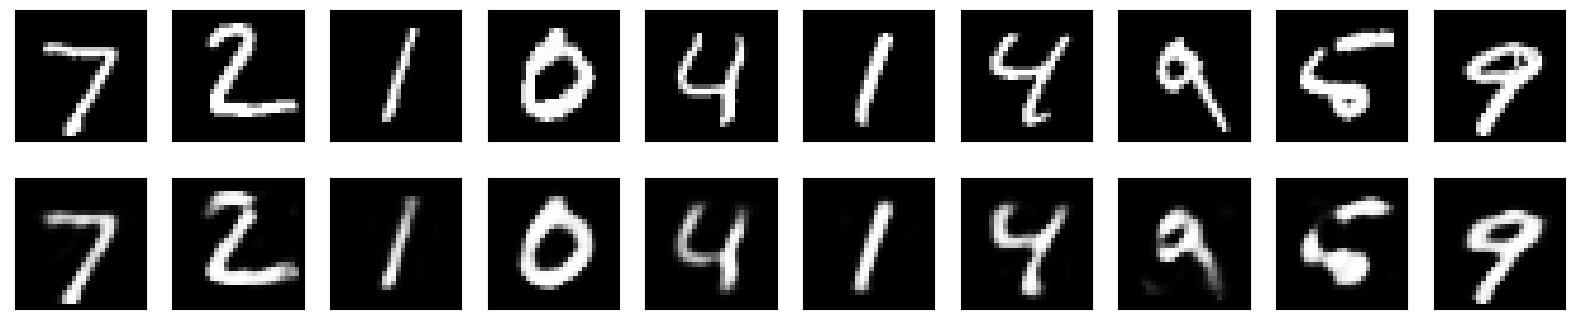

In [ ]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### 2.Implement Deep autoencoder

In [ ]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/100
235/235 [==============================] - 3s 10ms/step - loss: 0.2454 - val_loss: 0.1658
Epoch 2/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1501 - val_loss: 0.1364
Epoch 3/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1305 - val_loss: 0.1227
Epoch 4/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1204 - val_loss: 0.1157
Epoch 5/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1151 - val_loss: 0.1121
Epoch 6/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1115 - val_loss: 0.1087
Epoch 7/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1086 - val_loss: 0.1065
Epoch 8/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1061 - val_loss: 0.1038
Epoch 9/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1036 - val_loss: 0.1015
Epoch 10/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1016 - val

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


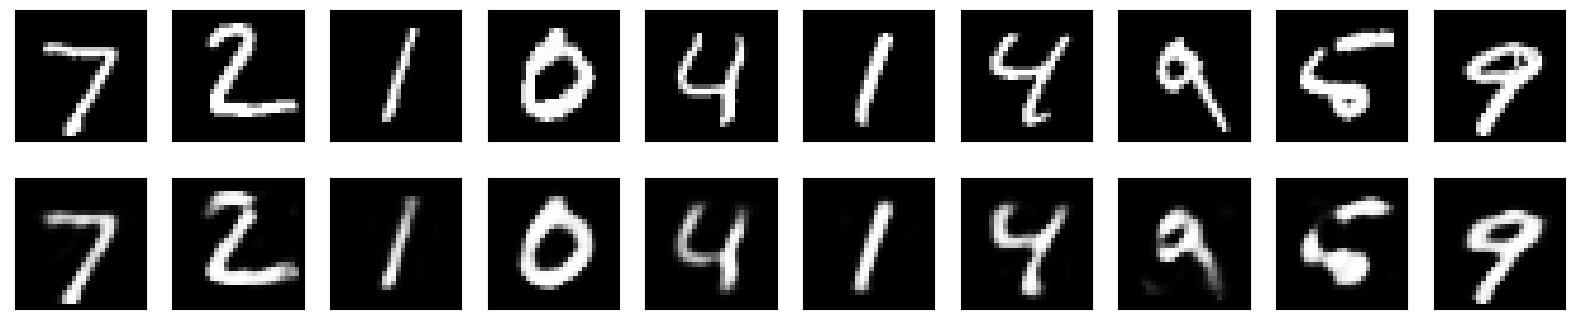

In [ ]:

import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### 3.Implement Convolutional autoencoder

In [ ]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/50
469/469 [==============================] - 15s 8ms/step - loss: 0.2023 - val_loss: 0.1403
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1326 - val_loss: 0.1253
Epoch 3/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1229 - val_loss: 0.1196
Epoch 4/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1177 - val_loss: 0.1145
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1142 - val_loss: 0.1117
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1117 - val_loss: 0.1097
Epoch 7/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1097 - val_loss: 0.1075
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1081 - val_loss: 0.1062
Epoch 9/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1067 - val_loss: 0.1052
Epoch 10/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1056 - val_loss: 0.103

313/313 [==============================] - 1s 4ms/step


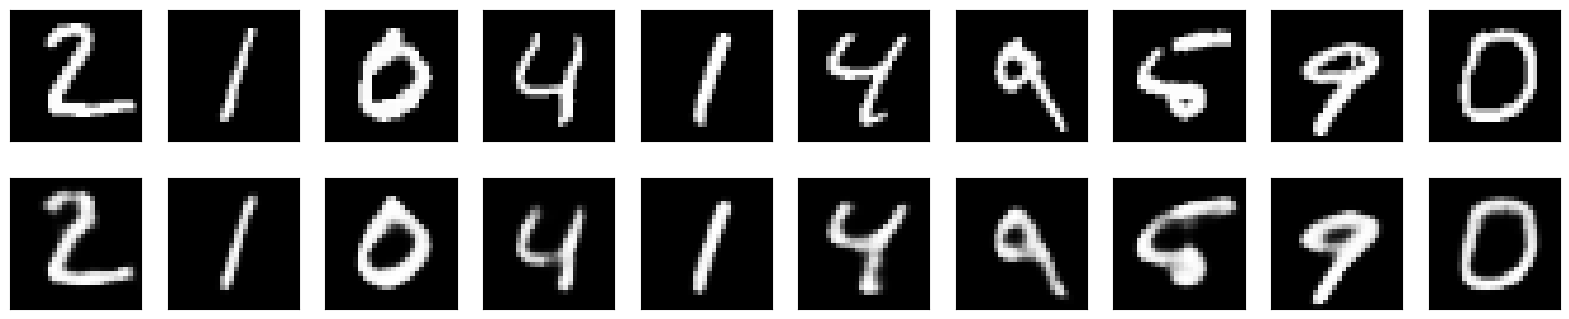

In [ ]:
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### 4.Compare results of all autoencoder

#### Vanilla autoencoder gives the loss of:- 0.0927
#### Deep autoencoder gives loss of:- 0.0823
#### Convolutional gives loss of:-0.0925
#### Convolutional autoencoder gives us the best generated result among all three